In [1]:
import sim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
ns = 2**np.arange(0,17) * 128

print(max(ns))

ray = sim.utils.ray(np.array([1,0,0]),2,25)

float2 = np.zeros_like(ns)
float4 = np.zeros_like(ns)
float8 = np.zeros_like(ns)

idx = 0
for n in tqdm(ns):
    df = sim.halos.Sample.Uniform(n)

    output,time = sim.static_solver.evaluate(ray,df,precision="f2")
    float2[idx] = time

    output,time = sim.static_solver.evaluate(ray,df,precision="f4")
    float4[idx] = time

    output,time = sim.static_solver.evaluate(ray,df,precision="f8")
    float8[idx] = time
    
    idx += 1

8388608


100%|██████████| 17/17 [00:22<00:00,  1.34s/it]


In [13]:
def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 4]

plot_pretty()

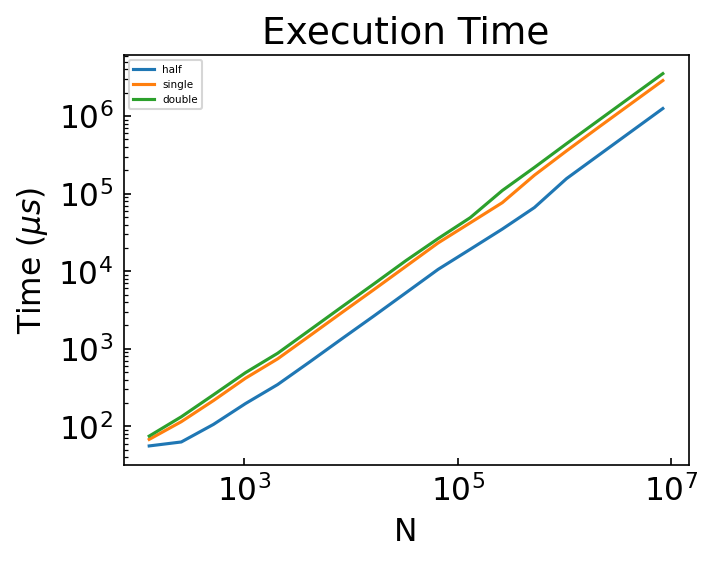

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(ns,float2,label="half")
ax.plot(ns,float4,label="single")
ax.plot(ns,float8,label="double")
ax.set_xscale('log')
ax.set_yscale('log')
#ax.yaxis.set_major_locator(plt.LogLocator(numticks=7,subs="auto"))
ax.set_ylabel(r"Time ($\mu s$)")
ax.set_xlabel("N")
ax.legend()
ax.set_title("Execution Time")
plt.tight_layout()
plt.savefig("execution_time.jpg")
plt.show()